<a href="https://colab.research.google.com/github/rajachekuri/pymodbus/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/NewspaperData.csv")
df.head(3)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [ ]:
df.corr()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


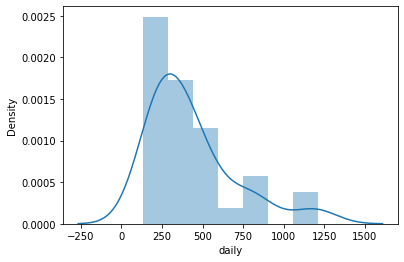

In [7]:
import seaborn as sns
sns.distplot(df['daily'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


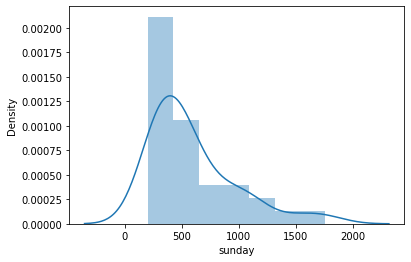

In [9]:
sns.distplot(df['sunday'])

ols - ordinary list squares method

In [13]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = df).fit()

In [15]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

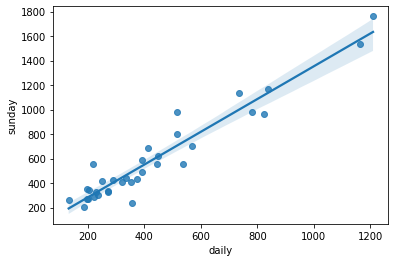

In [14]:
sns.regplot(x='daily', y='sunday', data = df);

rsquared values will tell us how good is our model..
r2 > 0.65 ok, if > 0.7 good, if> 0.8 veryGood,if > 0.9 excellent.

In [16]:
model.rsquared

0.9180596895873295

if pvalues for variable is lessthan 0.05 then that variable is significant to predict dependent variable.

In [20]:
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [22]:
newData = pd.Series([200,300])

In [24]:
dataPredit = pd.DataFrame(newData,columns=['daily'])

In [ ]:
dataPredit 

In [26]:
model.predict(dataPredit)

0    281.778581
1    415.750057
dtype: float64